In [1]:
#%%
from utils.data import Data

import pandas as pd
import time

In [2]:
#%%
df1 = Data().get300K()

/home/mutaz/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


set index
time to load 2.46


In [3]:
df1.head(10)

,bilayer,monolayer1,monolayer2,IE,IE_error,IE_rel_error,C33,C33_error,C33_rel_err
uid,,,,,,,,,
Hf3Te2_Mo1S2-T1,Hf3Te2_Mo1S2-T1,Hf3Te2,Mo1S2-T1,-0.698046,0.081306,0.058239,36.954759,6.369837,0.086184
Hf3Te2_W1S2-T1,W1S2-T1_Hf3Te2,W1S2-T1,Hf3Te2,-0.677167,0.080142,0.059174,44.432743,7.523579,0.084663
Cr1S2-T1_Hf3Te2,Hf3Te2_Cr1S2-T1,Hf3Te2,Cr1S2-T1,-0.661212,0.074767,0.056538,54.217246,11.076879,0.102153
Ca2La2I10-T1_Ti2Ge2O6,Ti2Ge2O6_Ca2La2I10-T1,Ti2Ge2O6,Ca2La2I10-T1,-0.658413,0.117797,0.089456,49.623362,18.454026,0.185941
Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1_Ta3Te1I7,Ca2La2I10-T1,Ta3Te1I7,-0.657006,0.083776,0.063756,28.505406,4.794372,0.084096
Ca2La2I10_Ti2Ge2O6,Ca2La2I10_Ti2Ge2O6,Ca2La2I10,Ti2Ge2O6,-0.654798,0.122613,0.093626,107.532152,43.877526,0.204020
Ca2La2I10_Ti6H4O14,Ca2La2I10_Ti6H4O14,Ca2La2I10,Ti6H4O14,-0.653412,0.124932,0.095599,142.223580,51.729440,0.181860
Ca2La2I10-T1_Ti6H4O14,Ca2La2I10-T1_Ti6H4O14,Ca2La2I10-T1,Ti6H4O14,-0.650855,0.126579,0.097241,75.621323,31.855674,0.210626
Ca2La2I10-T1_Te2Au1,Te2Au1_Ca2La2I10-T1,Te2Au1,Ca2La2I10-T1,-0.649248,0.102973,0.079302,30.607404,7.194662,0.117531


## prepare summary of monolayer for sorting

In [4]:
monolayers = df1.monolayer1.unique()
print(f"{monolayers.size} unique monolayers")

770 unique monolayers


In [5]:
# tqdm for status bar 
from tqdm import tqdm 

In [6]:
# initialise dictionary of summary values 

dict ={
    'monolayer' :[],
    'corr': [], 
    'IE_mean' : [], 
    'C33_mean' : []
}

# calculate summaries and add them to dictionary 
for monolayer_name in tqdm(monolayers): 
    # fitler df1 by monolayer_name in both monolayer1 and monolayer2 columns 
    monolayer_filter = (df1.monolayer1 == monolayer_name) | (df1.monolayer2 == monolayer_name)
    df_filtered = df1[monolayer_filter].loc[:,['IE','C33']]
    
    # get summary stats for all columns 
    df_describe = df_filtered.describe()
    df_describe['stat'] = df_describe.index
    
    # calculate corr 
    df_corr = df_filtered.corr()
    
    # add corr and mean stat to dict 
    dict['monolayer'].append(monolayer_name)
    dict['corr'].append(abs(df_corr.iloc[0,1]))
    dict['IE_mean'].append(df_describe.loc['mean'].IE)
    dict['C33_mean'].append(df_describe.loc['mean'].C33)
    

100%|██████████| 770/770 [00:28<00:00, 27.41it/s]


In [7]:
#dict

In [8]:
# create summary df  and sort by IE_mean
df_summary = pd.DataFrame(dict)#.set_index('monolayer')
print(df_summary.shape)



(770, 4)


In [9]:
df_summary = df_summary.sort_values('IE_mean', ascending=False) # should be the median not the mean 
print(df_summary.head())
print(df_summary.tail())

    monolayer      corr   IE_mean   C33_mean
376     In2S2  0.003701 -0.265269  34.059126
621     As4S6  0.087791 -0.267040  45.209798
737    Al2Cl6  0.088766 -0.268751  33.167137
690    Tc4P16  0.003445 -0.269069  38.149212
669  Al2Cl2O2  0.018834 -0.269303  31.895178
       monolayer      corr   IE_mean   C33_mean
39      Ta3Te1I7  0.100655 -0.474007  42.045382
7          V4F16  0.045211 -0.478909  35.648263
25      Ti6H4O14  0.057783 -0.499601  78.476018
2       Ti2Ge2O6  0.080933 -0.503477  52.999315
8   Sr2Ti2Si4O14  0.092004 -0.517371  95.011964


In [10]:
ordered_monolayers = df_summary.monolayer
print(ordered_monolayers)

376           In2S2
621           As4S6
737          Al2Cl6
690          Tc4P16
669        Al2Cl2O2
           ...     
39         Ta3Te1I7
7             V4F16
25         Ti6H4O14
2          Ti2Ge2O6
8      Sr2Ti2Si4O14
Name: monolayer, Length: 770, dtype: object


## heatmaps 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#https://python-graph-gallery.com/90-heatmaps-with-various-input-format/


In [12]:
df1_IE_wide=df1.pivot_table( index='monolayer1', columns='monolayer2', values='IE' )

In [13]:
df1_IE_wide.index

Index(['Ag1Bi1P2Se6', 'Ag2F4', 'Ag2I2', 'Ag2O4F2', 'Al1Pd5I2', 'Al2Cl2O2',
       'Al2Cl6', 'Al2H2O4', 'Al2H2O4-T1', 'Al2H6O6',
       ...
       'Zr2I4', 'Zr2N2Cl2', 'Zr2S6', 'Zr2Se6', 'Zr2Te10', 'Zr2Te2P1', 'Zr2Te6',
       'Zr3Mo6O24', 'Zr3Te6Cl36', 'Zr4H2Br4'],
      dtype='object', name='monolayer1', length=770)

In [14]:
df1_IE_wide.info()
df1_IE_wide.index = pd.CategoricalIndex(data = df1_IE_wide.index, 
                                       categories=ordered_monolayers, 
                                       ordered=True)


<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, Ag1Bi1P2Se6 to Zr4H2Br4
Columns: 770 entries, Ag1Bi1P2Se6 to Zr4H2Br4
dtypes: float64(770)
memory usage: 4.5+ MB


In [15]:
df1_IE_wide.index

CategoricalIndex(['Ag1Bi1P2Se6', 'Ag2F4', 'Ag2I2', 'Ag2O4F2', 'Al1Pd5I2',
                  'Al2Cl2O2', 'Al2Cl6', 'Al2H2O4', 'Al2H2O4-T1', 'Al2H6O6',
                  ...
                  'Zr2I4', 'Zr2N2Cl2', 'Zr2S6', 'Zr2Se6', 'Zr2Te10',
                  'Zr2Te2P1', 'Zr2Te6', 'Zr3Mo6O24', 'Zr3Te6Cl36', 'Zr4H2Br4'],
                 categories=['In2S2', 'As4S6', 'Al2Cl6', 'Tc4P16', 'Al2Cl2O2', 'Pa6Cl12O6', 'Sr2Al4Cl16', 'In2Cl2O2', ...], ordered=True, name='monolayer1', dtype='category', length=770)

In [16]:
df1_IE_wide.sort_index(level=0, inplace=True)

In [17]:
df1_IE_wide = df1_IE_wide.loc[:,ordered_monolayers]

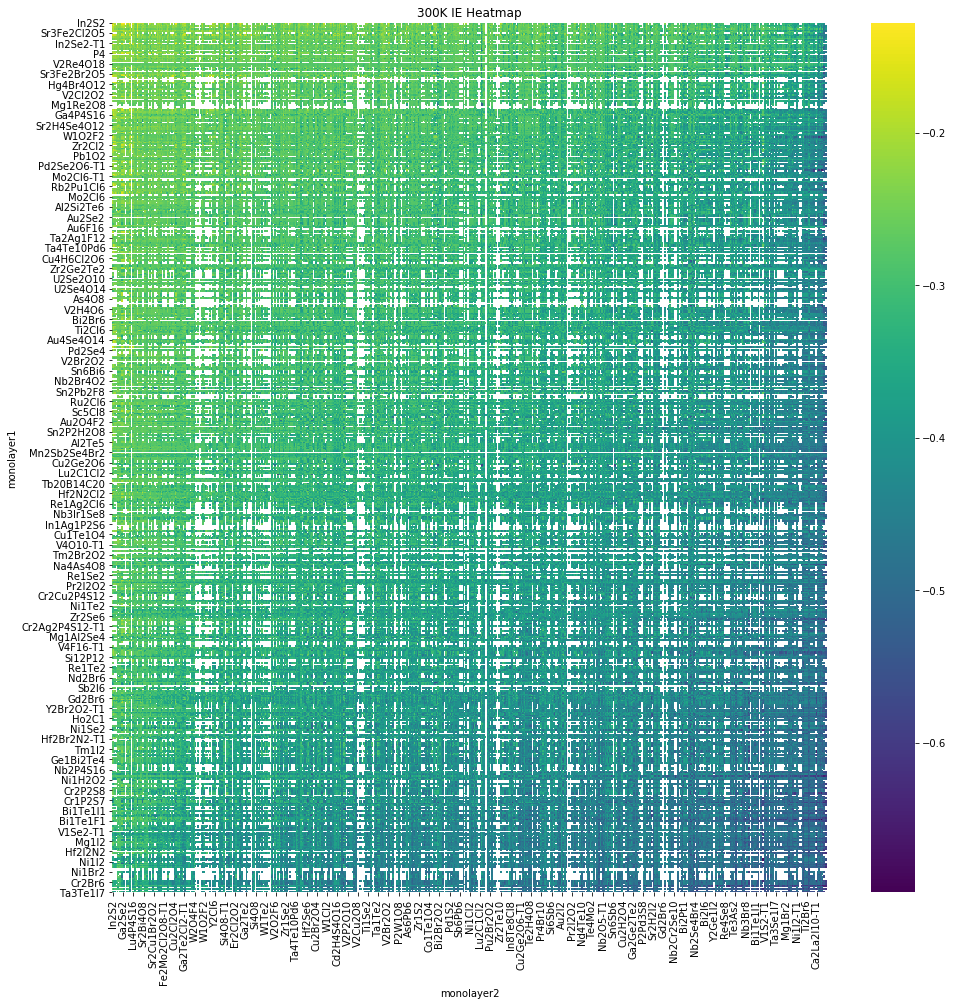

In [18]:

plt.figure(figsize=(16, 16))
heatmap_IE=sns.heatmap( df1_IE_wide, cmap='viridis' )
plt.title('300K IE Heatmap')
plt.savefig('plots/300K_IE_heatmap.png', transparent=True)


In [19]:
df1_C33_wide=df1.pivot_table( index='monolayer1', columns='monolayer2', values='C33' )
df1_C33_wide.index = pd.CategoricalIndex(data = df1_C33_wide.index, 
                                       categories=ordered_monolayers, 
                                       ordered=True)
df1_C33_wide.sort_index(level=0, inplace=True)
df1_C33_wide = df1_C33_wide.loc[:,ordered_monolayers]

In [20]:
df1_C33_wide

monolayer2,In2S2,As4S6,Al2Cl6,Tc4P16,Al2Cl2O2,Pa6Cl12O6,Sr2Al4Cl16,In2Cl2O2,Hg2I2N2O6,Sr3Fe2Cl2O5,...,Nb1S2-T1,Cr1S2-T1,Zr4H2Br4,Mg1Al2H8,Mo1S2-T1,Ta3Te1I7,V4F16,Ti6H4O14,Ti2Ge2O6,Sr2Ti2Si4O14
monolayer1,,,,,,,,,,,,,,,,,,,,,
In2S2,36.294828,NaN,NaN,NaN,NaN,28.007300,NaN,NaN,54.503722,24.998480,...,28.937179,33.999581,NaN,27.463438,28.667200,NaN,NaN,52.015857,NaN,NaN
As4S6,33.334892,62.925438,41.633460,NaN,NaN,37.054157,NaN,NaN,56.068385,39.279997,...,44.566397,41.051505,NaN,36.592419,35.381075,NaN,NaN,81.440395,NaN,NaN
Al2Cl6,26.567810,NaN,35.009799,NaN,NaN,26.658802,NaN,NaN,48.702277,26.398535,...,34.135841,32.862405,NaN,23.498592,22.330297,NaN,NaN,74.246468,NaN,NaN
Tc4P16,32.664813,48.082852,29.830601,42.650163,30.571197,40.357399,NaN,NaN,52.367031,29.088794,...,37.779592,31.920349,37.313033,31.494868,36.286962,42.722813,46.806635,70.741043,NaN,86.973262
Al2Cl2O2,32.802679,37.472404,26.301836,NaN,30.955769,25.175673,NaN,NaN,49.321311,22.792084,...,28.894347,34.257998,NaN,25.199335,22.864805,36.242682,NaN,57.450916,NaN,79.675950
Pa6Cl12O6,NaN,NaN,NaN,NaN,NaN,29.373059,NaN,NaN,NaN,NaN,...,NaN,22.349292,NaN,23.098906,20.239870,NaN,NaN,NaN,NaN,NaN
Sr2Al4Cl16,34.451597,34.630908,25.997710,32.316034,31.599758,45.649985,31.915792,NaN,58.418134,24.379200,...,21.628332,33.246502,21.885911,27.259378,38.426839,35.641767,51.476898,53.585558,44.488251,76.759700
In2Cl2O2,33.518460,37.946849,30.598987,30.548464,35.698553,28.950378,33.656671,39.301661,53.487405,26.144675,...,23.312507,26.505323,23.315773,26.576795,23.538094,39.575923,28.923584,58.455647,50.233368,85.608056
Hg2I2N2O6,NaN,NaN,NaN,NaN,NaN,49.591312,NaN,NaN,81.560633,NaN,...,56.909386,43.346219,NaN,51.356361,46.922352,NaN,NaN,NaN,NaN,NaN


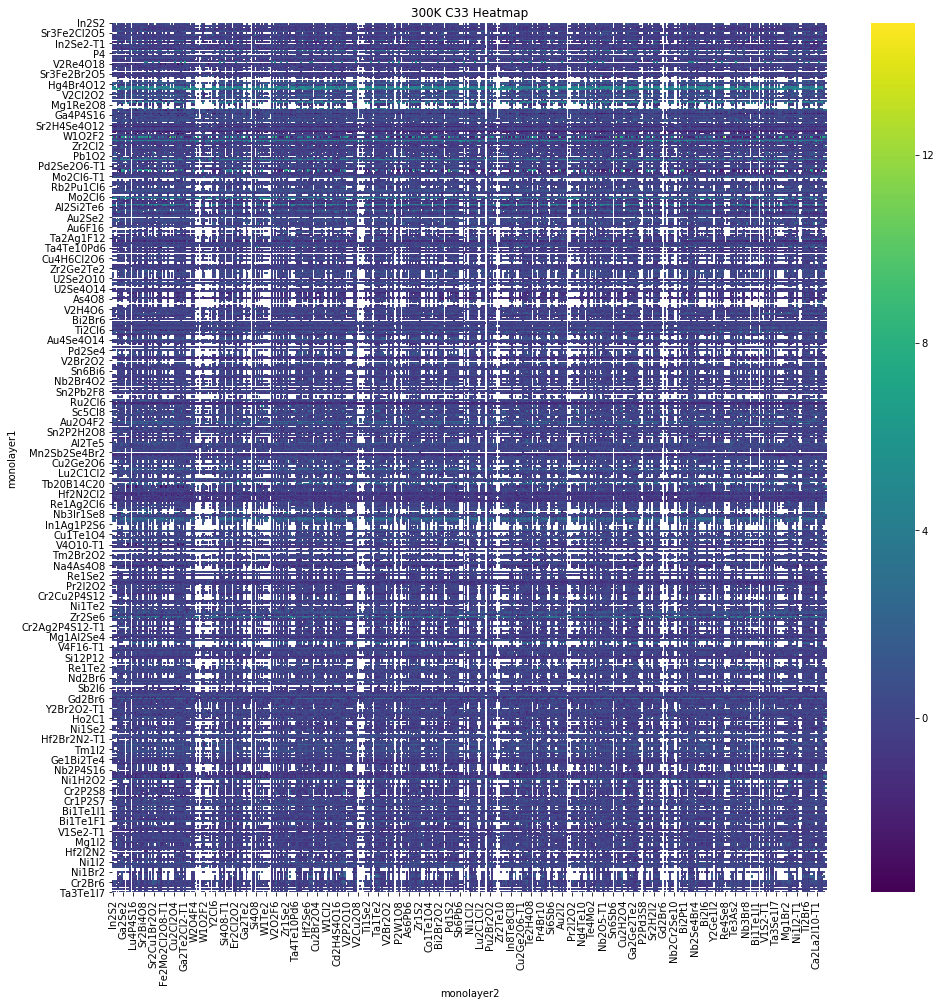

In [21]:
plt.figure(figsize=(16, 16))
df_plot = (df1_C33_wide - df1_C33_wide.mean())/df1_C33_wide.std()
heatmap_C33=sns.heatmap( df_plot, cmap='viridis')
plt.title('300K C33 Heatmap')
plt.savefig('plots/300K_C33_heatmap.png', transparent=True)

## Kernel Density Plots

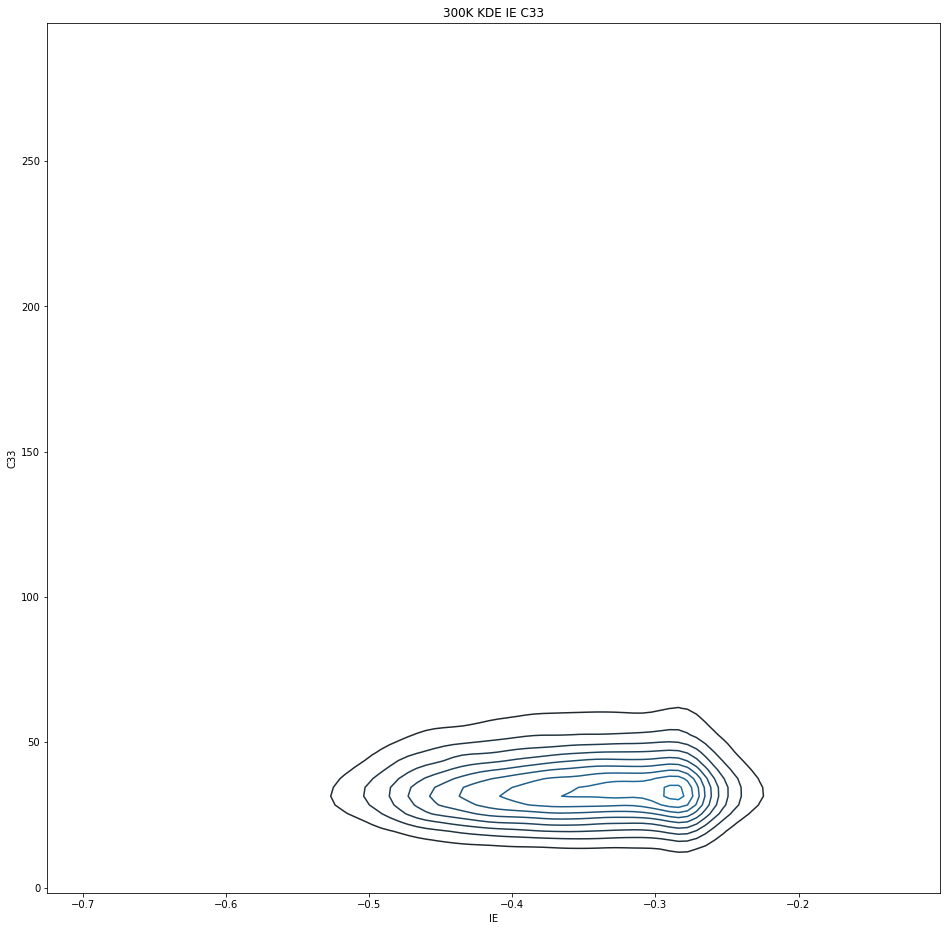

In [22]:
# calculate kernel density estimate and represent it as a contour plot
plt.figure(figsize=(16, 16))
sns.kdeplot(df1.IE, df1.C33)
plt.title('300K KDE IE C33')
plt.savefig('plots/300K_kde_IE_C33.png', transperant=True)

<Figure size 1152x1152 with 0 Axes>

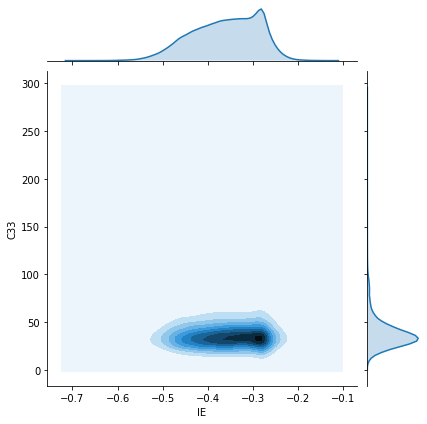

In [23]:
# 2D density + marginal distribution 
plt.figure(figsize=(16, 16))
sns.jointplot(df1.IE,df1.C33, kind='kde')
#plt.text(y=400, x= -.2, s='300K 2D density + marginal distribution  IE C33')
plt.savefig('plots/300K_kde_marginaldist_IE_C33.png', transperant=True)


In [24]:
# scatter plot on 18M

<Figure size 1152x1152 with 0 Axes>

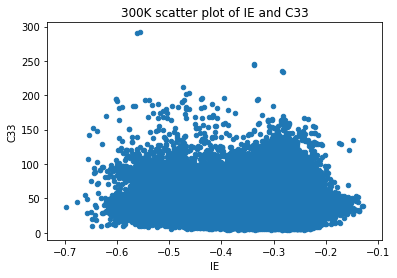

In [25]:
plt.figure(figsize=(16, 16))
df1[['IE','C33']].plot.scatter(0,1)
plt.title('300K scatter plot of IE and C33')
plt.savefig('plots/300K_s_IE_C33.png', transperant=True)

## plot the 18M 


In [26]:
df2 = Data().get18M()

set index
time to load 268.50


In [27]:
df2.shape

(18834453, 9)

In [ ]:
# 2D density + marginal distribution 
start_timer = time.time()
plt.figure(figsize=(16, 16))
sns.jointplot(df2.IE,df2.C33, kind='kde')
#plt.text(y=400, x= -.2, s='18M 2D density + marginal distribution  IE C33')
plt.savefig('plots/18M_kde_marginaldist_IE_C33.png', transperant=True)
stop_timer = time.time()

In [31]:
print(f"time {stop_timer - start_timer:.2f}")

time 7047.41


In [ ]:
# report on the 9- and 95% intervals for interlayer energy 